In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Wed Feb  3 14:23:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    77W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers
from keras.layers import Dropout
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.regularizers import l1

In [5]:
pd.set_option('display.expand_frame_repr', False)

In [6]:
Total_X_data = pd.read_csv("X_data.csv")
Total_Y_data = pd.read_csv("Y_data_voltage.csv")

Total_X_data.drop("Unnamed: 0", axis=1, inplace=True)
Total_Y_data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
Total_X_data.shape

(5344, 76)

In [8]:
Total_X_data

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),g_Na(microS),g_t(microS),a_endo,b_endo,g_ss(microS),g_K1(microS),g_f(microS),f_Na,g_B_Na(microS),g_B_Ca(microS),g_B_K(microS),E_Ca(millivolt),Ca_o(millimolar),g_D(um3_per_ms),J_R(um3_per_ms),J_L(um3_per_ms),N,K_mNa(mM),K_mCa(mM),eta,k_sat,g_NCX(mM_per_ms),g_SERCA(mM_per_ms),K_SERCA(mM),g_pCa(mM_per_ms),K_mpCa(mM),g_CaB(mM_per_mV_ms),g_SRl(per_ms),k_CMDN(mM),B_CMDN(mM),k_on(per_mM_per_ms),k_Ref_off(per_ms),gamma_trpn,alpha_0(per_ms),alpha_r1(per_ms),alpha_r2(per_ms),n_Rel,K_z,n_Hill,Ca_50ref(mM),z_p,beta_1,beta_0,T_ref(N_per_mm2),a in component Cross_Bridges,A_1,A_2,A_3,alpha_1(per_ms),alpha_2(per_ms),alpha_3(per_ms),V_L(mV),del_VL(mV),phi_L,t_L(ms),tau_L(ms),tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,0.943460,0.035996,0.398748,0.367971,0.006301,0.023025,0.001178,0.101475,0.000052,0.000037,0.000189,50.378929,0.912795,0.063656,0.028554,0.000638,29033.551274,67.725076,1.085710,0.212287,0.094548,0.045182,0.000432,0.000601,0.000003,0.000726,3.577211e-08,0.000012,0.002797,0.061828,54.703623,0.122116,2.809838,0.009072,0.002374,0.000876,3.616333,0.188943,4.247229,0.000591,0.994816,-4.506566,3.837668,69.613973,0.485194,-31.005231,183.081552,84.382845,0.027666,0.136102,0.906774,-2.644113,6.127889,2.776715,1.202394,893.730844,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,0.873344,0.033241,0.840158,0.419822,0.005810,0.019431,0.000894,0.129981,0.000100,0.000022,0.000203,77.398315,1.273687,0.091899,0.028506,0.000713,48068.129504,86.484521,1.179412,0.241322,0.061292,0.048726,0.000491,0.000525,0.000003,0.000378,2.439642e-08,0.000028,0.002396,0.031686,148.035907,0.270115,2.130209,0.004325,0.002281,0.002287,3.098222,0.176333,1.720766,0.000746,0.479735,-2.144745,3.374904,39.436246,0.242832,-37.055382,77.068914,163.237275,0.033940,0.165306,0.898471,-2.777012,8.826759,2.609261,0.828769,760.785799,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,0.427102,0.051464,0.541589,0.294336,0.005527,0.032682,0.001876,0.131524,0.000115,0.000018,0.000144,63.824791,0.960379,0.041408,0.019436,0.000844,36760.361016,129.362895,1.567416,0.415073,0.076082,0.047526,0.000574,0.000697,0.000002,0.000395,3.902071e-08,0.000023,0.001901,0.034382,57.967900,0.261788,2.841805,0.007619,0.002156,0.001304,1.927688,0.215191,3.876491,0.001180,0.689346,-3.254414,2.520540,51.385288,0.382186,-18.549011,154.117366,94.889238,0.039312,0.067920,0.766250,-1.977765,6.814161,2.093193,1.398835,641.688994,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,1.186931,0.051356,0.508838,0.267433,0.004183,0.016378,0.000872,0.217301,0.000077,0.000048,0.000191,83.989147,1.073941,0.093631,0.022058,0.000796,35813.754983,77.915364,1.183638,0.317736,0.096556,0.021336,0.000300,0.000704,0.000002,0.000336,2.190880e-08,0.000021,0.002133,0.046351,104.319744,0.139568,2.218931,0.005965,0.002652,0.002351,4.334115,0.134191,4.066621,0.001353,0.580554,-3.842275,7.205187,74.265184,0.214581,-36.520512,188.191449,183.787629,0.020841,0.194512,0.357368,-1.225460,10.145411,2.740481,0.851633,798.744010,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,0.838384,0.024628,0.394305,0.420007,0.005825,0.023415,0.001802,0.241262,0.000071,0.000018,0.000115,68.291056,1.014535,0.067958,0.020678,0.000955,61319.601263,59.46208

In [9]:
Total_X_data = Total_X_data.iloc[:, [0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19,
            23, 25, 26, 27, 28, 29, 31, 32, 33, 36, 37, 38, 39, 40, 41, 49, 55,
            57, 58, 60, 61, 62, 63, 64, 65, 68, 69, 70]]

In [10]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [11]:
X_data = Total_X_data[1068:]
Y_data = Total_Y_data[1068:]

In [12]:
X_data.shape

(4276, 45)

In [13]:
Y_data.shape

(4276, 250)

## Scaling and splitting the X_data and Y_data

In [14]:
scaler_x = StandardScaler().fit(X_data)
scaler_y = StandardScaler().fit(Y_data)

X_data = scaler_x.transform(X_data)
Y_data = scaler_y.transform(Y_data)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_data,Y_data,test_size=0.2,random_state=357, shuffle=True)

## TRAINING THE MODEL

In [16]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [17]:

model1 = models.Sequential()
model1.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(232,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer=optimizer, loss='mse', metrics=[r_square])


In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 232)               10672     
_________________________________________________________________
batch_normalization (BatchNo (None, 232)               928       
_________________________________________________________________
dropout (Dropout)            (None, 232)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 232)               54056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 232)               928       
_________________________________________________________________
dropout_1 (Dropout)          (None, 232)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 232)               5

In [19]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [20]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)



In [21]:
callbacks = [callback,reduce_lr]

In [22]:
%%time
history1 = model1.fit(X_train, y_train,
                  epochs=2000,
                  batch_size=128,
                 validation_data=(X_val, y_val),shuffle=True, callbacks =[callbacks])

Epoch 1/2000
27/27 [==============================] - 3s 32ms/step - loss: 2.1520 - r_square: -1.1922 - val_loss: 1.0489 - val_r_square: -0.0092
Epoch 2/2000
27/27 [==============================] - 0s 9ms/step - loss: 2.0253 - r_square: -1.0435 - val_loss: 1.0519 - val_r_square: -0.0122
Epoch 3/2000
27/27 [==============================] - 0s 10ms/step - loss: 1.8975 - r_square: -0.9341 - val_loss: 1.0464 - val_r_square: -0.0073
Epoch 4/2000
27/27 [==============================] - 0s 11ms/step - loss: 1.7634 - r_square: -0.7725 - val_loss: 1.0140 - val_r_square: 0.0232
Epoch 5/2000
27/27 [==============================] - 0s 10ms/step - loss: 1.5957 - r_square: -0.6208 - val_loss: 0.9357 - val_r_square: 0.0975
Epoch 6/2000
27/27 [==============================] - 0s 9ms/step - loss: 1.4096 - r_square: -0.4422 - val_loss: 0.8147 - val_r_square: 0.2125
Epoch 7/2000
27/27 [==============================] - 0s 9ms/step - loss: 1.2578 - r_square: -0.2880 - val_loss: 0.6941 - val_r_square:

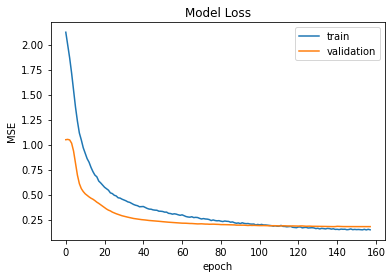

In [23]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

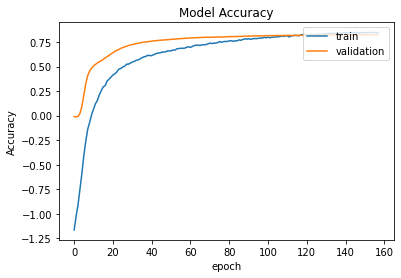

In [24]:
plt.plot(history1.history['r_square'])
plt.plot(history1.history['val_r_square'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Text(0.5, 0, 'Epochs')

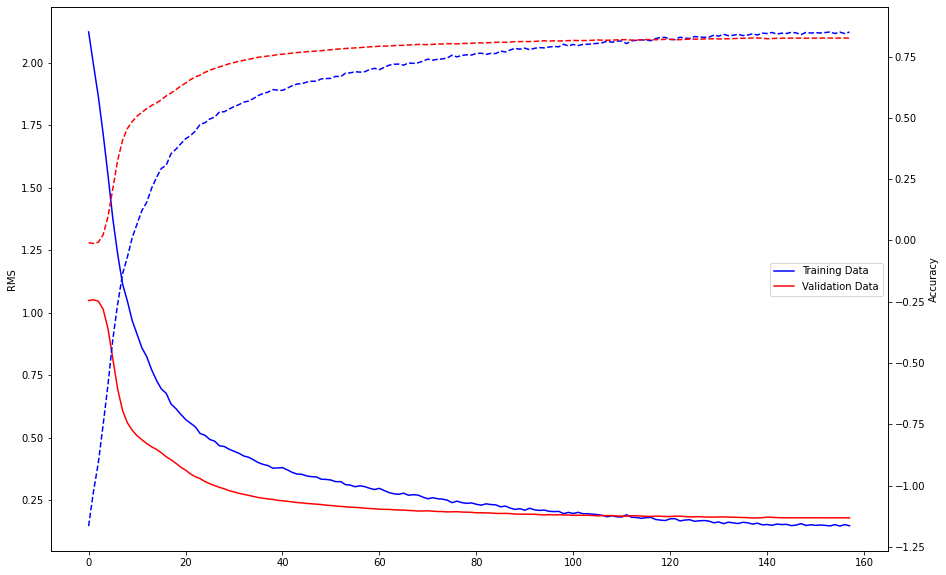

In [25]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'][:2000],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'][:2000],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'][:2000],'--',c='blue')
ax2.plot(history1.history['val_r_square'][:2000],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')


## TRAINING THE WHOLE MODEL AND PREDICTION

In [26]:
stop

NameError: ignored

In [28]:
##X_data and Y_data are already scaled

X_train_all = X_data
Y_train_all = Y_data


In [29]:

model2 = models.Sequential()
model2.add(layers.Dense(232, activation='relu',input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(232,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(layers.Dense(y_train.shape[1]))
optimizer = keras.optimizers.Adam(lr=0.0001)
model2.compile(optimizer=optimizer, loss='mse', metrics=[r_square])

In [30]:
%%time
history2 = model2.fit(X_train_all, Y_train_all,
                  epochs=158,
                  batch_size=128,
                  )

Epoch 1/158
34/34 [==============================] - 2s 6ms/step - loss: 2.1599 - r_square: -1.1807
Epoch 2/158
34/34 [==============================] - 0s 7ms/step - loss: 1.9871 - r_square: -1.0144
Epoch 3/158
34/34 [==============================] - 0s 6ms/step - loss: 1.8523 - r_square: -0.8344
Epoch 4/158
34/34 [==============================] - 0s 7ms/step - loss: 1.6315 - r_square: -0.6657
Epoch 5/158
34/34 [==============================] - 0s 7ms/step - loss: 1.4172 - r_square: -0.4151
Epoch 6/158
34/34 [==============================] - 0s 7ms/step - loss: 1.2012 - r_square: -0.2090
Epoch 7/158
34/34 [==============================] - 0s 7ms/step - loss: 1.0777 - r_square: -0.0713
Epoch 8/158
34/34 [==============================] - 0s 7ms/step - loss: 0.9920 - r_square: 0.0024
Epoch 9/158
34/34 [==============================] - 0s 7ms/step - loss: 0.9287 - r_square: 0.0688
Epoch 10/158
34/34 [==============================] - 0s 7ms/step - loss: 0.8566 - r_square: 0.1313
Ep

In [ ]:
## Prediction on Test data

In [31]:
X_test = Total_X_data[:1068]
Y_test = Total_Y_data[:1068]

In [33]:
Test_X_data = scaler_x.transform(X_test)
Test_Y_data = scaler_y.transform(Y_test)

In [34]:
ypred2 = model2.predict(Test_X_data)
print(r2_score(Test_Y_data,ypred2))

0.7917485042554661
